<a href="https://colab.research.google.com/github/Medasimone/Files/blob/main/Regression_hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import your libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import matplotlib.pyplot as plt


In [ ]:
#import data set from   https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression

!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d nikhil7280/student-performance-multiple-linear-regression
!unzip disaster-dataset.zip


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression
License(s): other
  0% 0.00/48.5k [00:00<?, ?B/s]
100% 48.5k/48.5k [00:00<00:00, 1.19MB/s]
unzip:  cannot find or open disaster-dataset.zip, disaster-dataset.zip.zip or disaster-dataset.zip.ZIP.


In [ ]:
# save the unzip '/content/public_emdat_project.csv' data as df

df = pd.read_csv('/content/student-performance-multiple-linear-regression.zip') #, encoding='latin-1') # Try reading the file with 'latin-1' encoding. If this doesn't work, try other encodings like 'ISO-8859-1'.
df.head()


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [ ]:
df.nunique()

,0
Hours Studied,9
Previous Scores,60
Extracurricular Activities,2
Sleep Hours,6
Sample Question Papers Practiced,10
Performance Index,91


In [ ]:
# Encode the 'diagnosis' column
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

In [ ]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [ ]:
# Split the data into X (features) and y (target)  --- REMEMBER TO CHANGE THE target from MSRP
X = df.drop('Performance Index', axis=1)   # Remember this syntax right here... this syntax is what will allow you to drop ANY column from your dataset in pandas
y = df['Performance Index']

In [ ]:
# Split into Train/Test
# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Linear Regression: MSE = 4.083, R² = 0.989
Ridge Regression: MSE = 4.083, R² = 0.989
Lasso Regression: MSE = 4.878, R² = 0.987
Support Vector Regressor: MSE = 5.387, R² = 0.985
Random Forest: MSE = 5.189, R² = 0.986
Gradient Boosting: MSE = 4.365, R² = 0.988


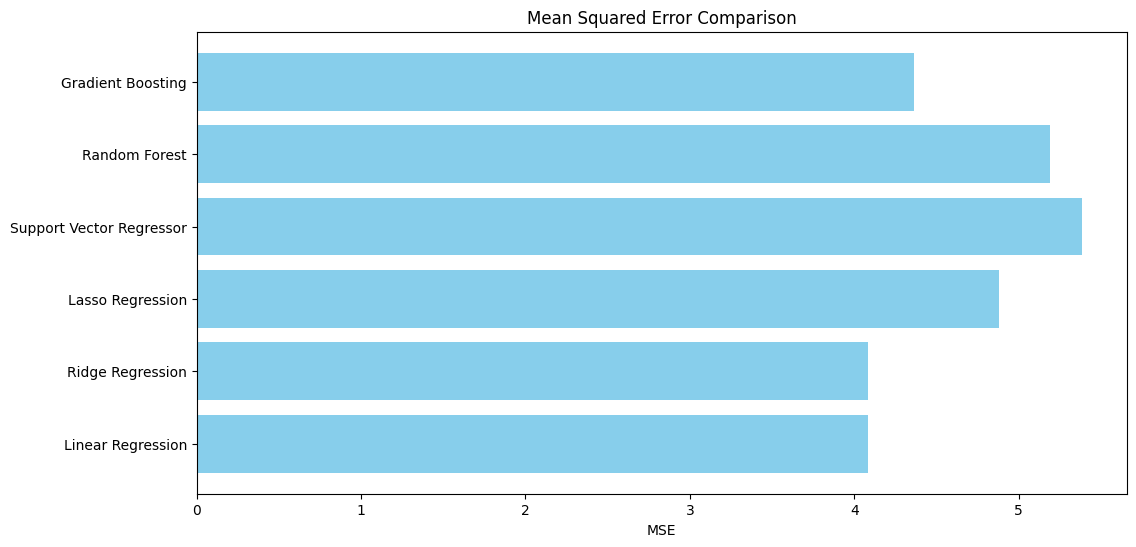

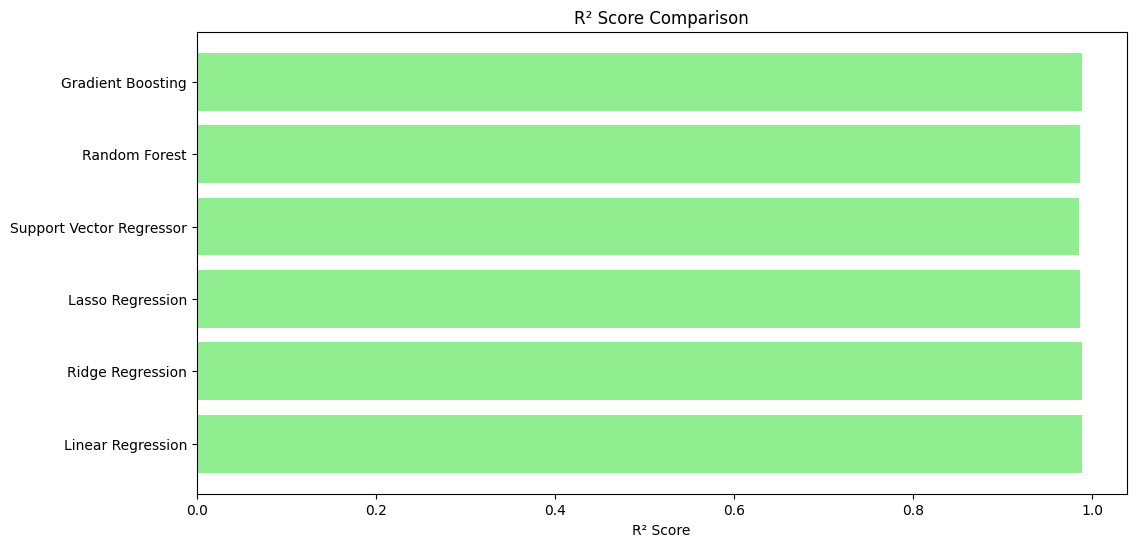

In [ ]:
# Define a list of models
models = []
models.append(('Linear Regression', LinearRegression()))
models.append(('Ridge Regression', Ridge()))
models.append(('Lasso Regression', Lasso()))
models.append(('Support Vector Regressor', SVR()))
#models.append(('Decision Tree', DecisionTreeRegressor())) was not able to run
models.append(('Random Forest', RandomForestRegressor()))
models.append(('Gradient Boosting', GradientBoostingRegressor()))

# Initialize lists to store results
results = []
names = []
mse_scores = []
r2_scores = []

# Loop through models and evaluate each
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate and store performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse_scores.append(mse)
    r2_scores.append(r2)

    # Print results
    print(f"{name}: MSE = {mse:.3f}, R² = {r2:.3f}")
    results.append((name, mse, r2))

# Visualize results
plt.figure(figsize=(12, 6))
plt.barh([x[0] for x in results], [x[1] for x in results], color='skyblue')
plt.title('Mean Squared Error Comparison')
plt.xlabel('MSE')
plt.show()

plt.figure(figsize=(12, 6))
plt.barh([x[0] for x in results], [x[2] for x in results], color='lightgreen')
plt.title('R² Score Comparison')
plt.xlabel('R² Score')
plt.show()
